<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Tablero_de_Colores_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Supongamos que tenemos un tablero con **cuatro sectores** numerados $ 0, 1, 2, 3 $.  
Lanzamos **dos monedas**, y avanzamos en **sentido horario** el número de **caras** que aparecen.  
Este procedimiento se repite indefinidamente.

Los **estados** del sistema son:

$$
S = \{0, 1, 2, 3\}
$$

Las posibles transiciones dependen del número de caras en dos monedas:

- $ P(0\ \text{caras}) = \frac{1}{4} $
- $ P(1\ \text{cara}) = \frac{1}{2} $
- $ P(2\ \text{caras}) = \frac{1}{4} $

Desde cada estado $ i $, las transiciones son:

- A $ i $ con probabilidad $ \frac{1}{4}$
- A $ i+1 \mod 4 $ con probabilidad $ \frac{1}{2} $
- A $ i+2 \mod 4 $ con probabilidad $ \frac{1}{4} $

Matriz de Transición

$$
P = \begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\end{bmatrix}
$$

Distribución Estacionaria

Buscamos $ \pi = [\pi_0, \pi_1, \pi_2, \pi_3] $ tal que:

$$
\pi P = \pi \quad \text{y} \quad \sum_{i=0}^3 \pi_i = 1
$$

Por simetría, se cumple que:

$$
\pi_0 = \pi_1 = \pi_2 = \pi_3 = \frac{1}{4}
$$

Verificación:

$$
\left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4} \right] P = \left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4} \right]
$$




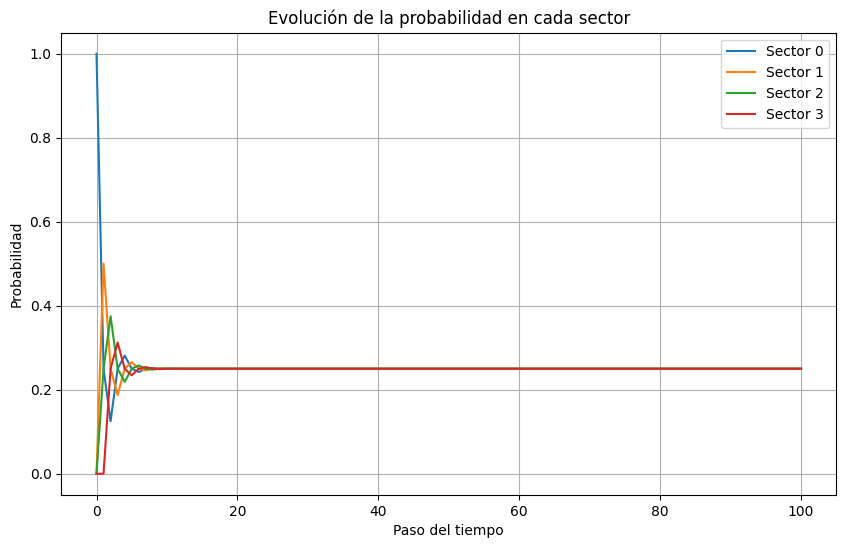

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Estados: 0 = rojo, 1 = naranja, 2 = verde, 3 = azul
n_estados = 4

# Matriz de transición según el enunciado
P = np.array([
    [1/4, 1/2, 1/4, 0],
    [0, 1/4, 1/2, 1/4],
    [1/4, 0, 1/4, 1/2],
    [1/2, 1/4, 0, 1/4]
])

# Estado inicial (por ejemplo, comenzamos en el sector 0)
estado_inicial = np.array([1, 0, 0, 0])  # 100% de probabilidad en estado 0

# Número de pasos de la simulación
n_pasos = 100

# Guardamos la evolución de las probabilidades
historial = [estado_inicial]

estado_actual = estado_inicial.copy()

for _ in range(n_pasos):
    estado_siguiente = estado_actual @ P
    historial.append(estado_siguiente)
    estado_actual = estado_siguiente

# Convertimos historial a arreglo de NumPy
historial = np.array(historial)

# Graficamos la evolución de las probabilidades
plt.figure(figsize=(10, 6))
for i in range(n_estados):
    plt.plot(historial[:, i], label=f'Sector {i}')
plt.title('Evolución de la probabilidad en cada sector')
plt.xlabel('Paso del tiempo')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()
